STEP 1 : Install the following lib

In [19]:
pip install python-binance pandas numpy matplotlib yfinance scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STEP 2 : Export API keys 

In [59]:
from binance.client import Client

api_key = "W1mGedE8E8SPLB9O90fFCvCNUwJSyGwpVUvo8ED6A1ip97dC5JPo6GgMbti20Bzy"
secret_key = "3nnXTTfRJ3yVLITiIz2ZCkD1Hvd3xxMK8qjzCH4ySYYq0OgzyTowq4ajw7v3CEw5"

client = Client(api_key, secret_key)

print("API Connected ✅")


API Connected ✅


STEP 3 : CONNECT the API keys and Extract the follwing data for any given crppto 

In [60]:
from binance.client import Client
import pandas as pd

api_key = "YW1mGedE8E8SPLB9O90fFCvCNUwJSyGwpVUvo8ED6A1ip97dC5JPo6GgMbti20Bzy"
secret_key = "3nnXTTfRJ3yVLITiIz2ZCkD1Hvd3xxMK8qjzCH4ySYYq0OgzyTowq4ajw7v3CEw5"

client = Client(api_key, secret_key)

klines = client.get_historical_klines(
    "BTCUSDT",
    Client.KLINE_INTERVAL_1DAY,
    "5 years ago UTC"
)

data = pd.DataFrame(klines, columns=[
    "Time","Open","High","Low","Close","Volume",
    "CloseTime","QuoteVolume","Trades",
    "TakerBuyBase","TakerBuyQuote","Ignore"
])

data["Close"] = data["Close"].astype(float)
data["Open"] = data["Open"].astype(float)
data["High"] = data["High"].astype(float)
data["Low"] = data["Low"].astype(float)
data["Volume"] = data["Volume"].astype(float)

data["Time"] = pd.to_datetime(data["Time"], unit="ms")
data = data[["Time","Open","High","Low","Close","Volume"]]

print("Rows after download:", len(data))


Rows after download: 1826


STEP 4 :Lets now Specify the Historical data 

In [61]:
data["Return"] = data["Close"].pct_change()

data["MA7"] = data["Close"].rolling(7).mean()
data["MA21"] = data["Close"].rolling(21).mean()

data["Momentum"] = data["Close"].diff(5)
data["Volatility"] = data["Return"].rolling(10).std()

print("Rows before dropna:", len(data))

data = data.dropna()

print("Rows after dropna:", len(data))


Rows before dropna: 1826
Rows after dropna: 1806


In [62]:
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

data = data.dropna()

print("Rows after target:", len(data))


Rows after target: 1806


In [82]:
features = ["MA7","MA21","Momentum","Volatility"]

X = data[features]
y = data["Target"]


Here after all the data extraction , lets try to train the MODEL 

STEP 6 :

In [84]:
print("Total rows in data:", len(data))
print("Rows in X:", len(X))
print("Rows in y:", len(y))
print(data[["MA7","MA21","Momentum","Volatility","Target"]].head())


Total rows in data: 0
Rows in X: 0
Rows in y: 0
Empty DataFrame
Columns: [MA7, MA21, Momentum, Volatility, Target]
Index: []


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ["MA7","MA21","Momentum","Volatility"]

X = data[features]
y = data["Target"]

# Time-series split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

model = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

print("Model trained ✅")
print("Train size:", len(X_train))
print("Test size:", len(X_test))


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [78]:
# Ensure target exists
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

# Remove NaN rows
data = data.dropna()

print("Rows:", len(data))
print(data[["MA7","MA21","Momentum","Volatility","Target"]].isna().sum())


Rows: 0
MA7           0
MA21          0
Momentum      0
Volatility    0
Target        0
dtype: int64


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ["MA7","MA21","Momentum","Volatility"]

X = data[features]
y = data["Target"]

# Time-series split (no shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

model = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

print("Model trained ✅")


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [66]:
#lets target the next day price movement (1 if price goes up, 0 if it goes down or stays the same)
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)
data = data.dropna()


In [67]:
print("Rows in data:", len(data))
print(data.head())
print(data.tail())


Rows in data: 10
                Open      High      Low     Close        Volume  \
Time                                                              
2026-02-03  78738.60  79186.81  72945.5  75770.21   39120.10889   
2026-02-04  75770.21  76971.52  71888.0  73165.83   38375.36000   
2026-02-05  73165.84  73341.18  62345.0  62909.86  106298.82899   
2026-02-06  62909.87  71751.33  60000.0  70580.26   92539.21531   
2026-02-07  70580.26  71690.07  67300.0  69289.38   44255.48036   

               Close_time         Quote_volume    Trades  Taker_buy_base  \
Time                                                                       
2026-02-03  1770163199999  2986903008.57479190   9199445  17304.88253000   
2026-02-04  1770249599999  2852834631.53914640  10724002  17274.35569000   
2026-02-05  1770335999999  7198745594.28069360  15364010  49042.65006000   
2026-02-06  1770422399999  6134056670.61150540  13228528  49477.51198000   
2026-02-07  1770508799999  3058983879.06915240   7167427 

In [68]:
#now lets train a simple model to predict the target
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ["MA7","MA21","Momentum","Volatility"]

X = data[features]
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [69]:
# Price return
data["Return"] = data["Close"].pct_change()

# Moving averages
data["MA7"] = data["Close"].rolling(window=7).mean()
data["MA21"] = data["Close"].rolling(window=21).mean()

# Momentum (price change over 5 days)
data["Momentum"] = data["Close"].diff(5)

# Volatility (std of returns over 10 days)
data["Volatility"] = data["Return"].rolling(window=10).std()

# Remove NaN rows created by rolling & diff
data = data.dropna()


In [70]:
#Now lets evaluate the model and test its accuracy
from sklearn.metrics import accuracy_score

pred_test = model.predict(X_test)
acc = accuracy_score(y_test, pred_test)

print("Model Accuracy:", acc)


Model Accuracy: 0.6666666666666666


In [71]:
data["Prediction"] = model.predict(X)


In [72]:
data["Strategy_Return"] = data["Return"] * data["Prediction"]


In [73]:
data["Market_Cum"] = data["Return"].cumsum()
data["Strategy_Cum"] = data["Strategy_Return"].cumsum()


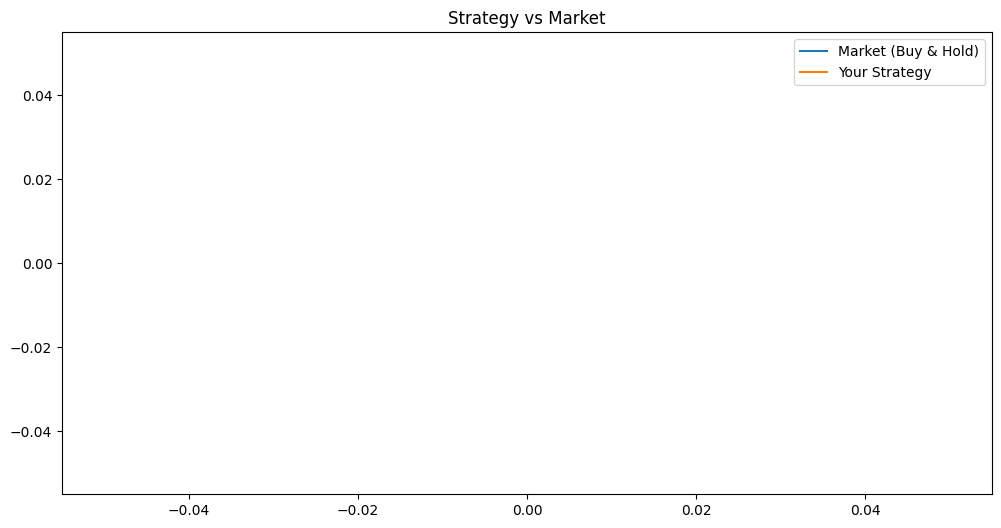

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data["Market_Cum"], label="Market (Buy & Hold)")
plt.plot(data["Strategy_Cum"], label="Your Strategy")
plt.legend()
plt.title("Strategy vs Market")
plt.show()


In [47]:
import numpy as np

# Sharpe Ratio
sharpe = (data["Strategy_Return"].mean() / data["Strategy_Return"].std()) * np.sqrt(252)

# Max Drawdown
cum = data["Strategy_Cum"]
drawdown = (cum - cum.cummax()).min()

print("Sharpe Ratio:", sharpe)
print("Max Drawdown:", drawdown)


Sharpe Ratio: nan
Max Drawdown: nan


In [48]:
# Recalculate returns
data["Return"] = data["Close"].pct_change()

# Predictions → strategy
data["Prediction"] = model.predict(X)
data["Strategy_Return"] = data["Return"] * data["Prediction"]

# Remove NaN
data = data.dropna()

# Cumulative
data["Market_Cum"] = data["Return"].cumsum()
data["Strategy_Cum"] = data["Strategy_Return"].cumsum()

print(data[["Market_Cum", "Strategy_Cum"]].tail())


Empty DataFrame
Columns: [Market_Cum, Strategy_Cum]
Index: []


In [50]:
print("Rows after download:", len(data))


Rows after download: 0


In [51]:
print("Rows after features:", len(data))


Rows after features: 0


In [52]:
print("Rows after target:", len(data))


Rows after target: 0
